In [1]:
from google.colab import drive
drive.mount('/content/gdrive')  

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [5]:
groupDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag','month']]

In [6]:
groupDf['Toxicity'] = groupDf['Toxicity'] * 10
groupDf['Toxicity'] = (groupDf['Toxicity'].apply(np.ceil)) / 10

In [7]:
groupDf = groupDf[groupDf['Toxicity'] != 0.0]

In [8]:
groupDf['user_id'].nunique()

59848

In [9]:
monthDf = groupDf[groupDf['month'] == "01"]

In [10]:
print(monthDf['user_id'].nunique())
print(len(monthDf['Toxicity']))

4131
35984


In [11]:
monthDf.head()

,user_id,Toxicity,qt_flag,rt_flag,month
247,3239623496,0.2,False,False,01
248,3239623496,0.1,False,False,01
249,3239623496,0.1,False,False,01
250,3239623496,0.1,False,False,01
251,3239623496,0.3,False,False,01


In [12]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [13]:
userDf = monthDf.groupby('user_id').apply(categorize_tweets)

In [14]:
userDf = userDf.reset_index()
userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})

In [15]:
userDf.head()

,user_id,user_category
0,633,o
1,24393,o_q
2,74523,o
3,690173,o
4,713263,o


In [16]:
userDf

,user_id,user_category
0,633,o
1,24393,o_q
2,74523,o
3,690173,o
4,713263,o
...,...,...
4126,825012688816181248,o
4127,825203273078538240,o
4128,825532893640458240,o
4129,825887620047704069,o


In [17]:
dict_cat = {}

cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]

for i in range(7):
    for j in range(10):
        string_want  = f"{cat_list[i]}_{(j+1)/10}" 
        dict_cat[string_want] = 0

print(dict_cat)

{'o_0.1': 0, 'o_0.2': 0, 'o_0.3': 0, 'o_0.4': 0, 'o_0.5': 0, 'o_0.6': 0, 'o_0.7': 0, 'o_0.8': 0, 'o_0.9': 0, 'o_1.0': 0, 'r_0.1': 0, 'r_0.2': 0, 'r_0.3': 0, 'r_0.4': 0, 'r_0.5': 0, 'r_0.6': 0, 'r_0.7': 0, 'r_0.8': 0, 'r_0.9': 0, 'r_1.0': 0, 'q_0.1': 0, 'q_0.2': 0, 'q_0.3': 0, 'q_0.4': 0, 'q_0.5': 0, 'q_0.6': 0, 'q_0.7': 0, 'q_0.8': 0, 'q_0.9': 0, 'q_1.0': 0, 'o_r_0.1': 0, 'o_r_0.2': 0, 'o_r_0.3': 0, 'o_r_0.4': 0, 'o_r_0.5': 0, 'o_r_0.6': 0, 'o_r_0.7': 0, 'o_r_0.8': 0, 'o_r_0.9': 0, 'o_r_1.0': 0, 'r_q_0.1': 0, 'r_q_0.2': 0, 'r_q_0.3': 0, 'r_q_0.4': 0, 'r_q_0.5': 0, 'r_q_0.6': 0, 'r_q_0.7': 0, 'r_q_0.8': 0, 'r_q_0.9': 0, 'r_q_1.0': 0, 'o_q_0.1': 0, 'o_q_0.2': 0, 'o_q_0.3': 0, 'o_q_0.4': 0, 'o_q_0.5': 0, 'o_q_0.6': 0, 'o_q_0.7': 0, 'o_q_0.8': 0, 'o_q_0.9': 0, 'o_q_1.0': 0, 'o_r_q_0.1': 0, 'o_r_q_0.2': 0, 'o_r_q_0.3': 0, 'o_r_q_0.4': 0, 'o_r_q_0.5': 0, 'o_r_q_0.6': 0, 'o_r_q_0.7': 0, 'o_r_q_0.8': 0, 'o_r_q_0.9': 0, 'o_r_q_1.0': 0}


In [18]:
for index, row in userDf.iterrows():
  cat = userDf['user_category'].iloc[index]
  # cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]] #mainLineOfCode
  cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]][["Toxicity"]].drop_duplicates()
  for j, c_row in cat_user.iterrows():
    t_score = c_row["Toxicity"]
    string_put = f"{cat}_{t_score}"
    dict_cat[string_put] += 1

print(dict_cat)


{'o_0.1': 2610, 'o_0.2': 857, 'o_0.3': 454, 'o_0.4': 340, 'o_0.5': 161, 'o_0.6': 101, 'o_0.7': 88, 'o_0.8': 71, 'o_0.9': 51, 'o_1.0': 28, 'r_0.1': 0, 'r_0.2': 0, 'r_0.3': 0, 'r_0.4': 0, 'r_0.5': 0, 'r_0.6': 0, 'r_0.7': 0, 'r_0.8': 0, 'r_0.9': 0, 'r_1.0': 0, 'q_0.1': 96, 'q_0.2': 7, 'q_0.3': 3, 'q_0.4': 4, 'q_0.5': 0, 'q_0.6': 0, 'q_0.7': 1, 'q_0.8': 0, 'q_0.9': 0, 'q_1.0': 0, 'o_r_0.1': 0, 'o_r_0.2': 0, 'o_r_0.3': 0, 'o_r_0.4': 0, 'o_r_0.5': 0, 'o_r_0.6': 0, 'o_r_0.7': 0, 'o_r_0.8': 0, 'o_r_0.9': 0, 'o_r_1.0': 0, 'r_q_0.1': 0, 'r_q_0.2': 0, 'r_q_0.3': 0, 'r_q_0.4': 0, 'r_q_0.5': 0, 'r_q_0.6': 0, 'r_q_0.7': 0, 'r_q_0.8': 0, 'r_q_0.9': 0, 'r_q_1.0': 0, 'o_q_0.1': 1300, 'o_q_0.2': 606, 'o_q_0.3': 341, 'o_q_0.4': 235, 'o_q_0.5': 120, 'o_q_0.6': 88, 'o_q_0.7': 58, 'o_q_0.8': 52, 'o_q_0.9': 25, 'o_q_1.0': 16, 'o_r_q_0.1': 0, 'o_r_q_0.2': 0, 'o_r_q_0.3': 0, 'o_r_q_0.4': 0, 'o_r_q_0.5': 0, 'o_r_q_0.6': 0, 'o_r_q_0.7': 0, 'o_r_q_0.8': 0, 'o_r_q_0.9': 0, 'o_r_q_1.0': 0}


In [19]:
sum(dict_cat.values())

7713

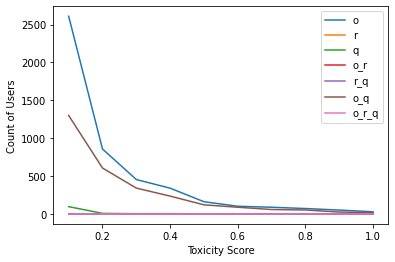

In [20]:
x = [i/10 for i in range(1, 11)]

for cat in cat_list:
    y = [dict_cat[f"{cat}_{tox}"] for tox in x]
    # print(y)
    plt.plot(x, y, label=cat)

plt.xlabel("Toxicity Score")
plt.ylabel("Count of Users")
# plt.title(f"Month - {len(monthDf['Toxicity'])}")
plt.legend()
plt.show()

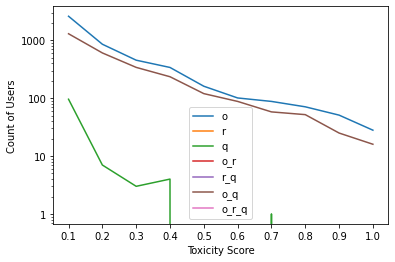

In [21]:
x = [i/10 for i in range(1, 11)]
for cat in cat_list:
    y = [dict_cat[f"{cat}_{tox}"] for tox in x]
    plt.semilogy(x, y, label=cat)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator())

plt.xlabel("Toxicity Score")
plt.ylabel("Count of Users")
plt.xticks(x)
# plt.set_ylim(bottom=0)
plt.legend()
plt.show()

In [22]:
# for i in UserDF.rows():
#   """i[0]- userid
#   i[1]- category"""
#   cat = i[1]
#   cat_user = monthDf.filter(i[0])
#   for j in cat_user.rows():
#     t_score = j["toxicity_score"]
#     string_put = f"{cat}_{t_score}"
#     dict_cat[string_put] += 1